In [2]:
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

In [1]:
def sample_gen(n ) :
    return np.random.normal(0, 1.0, n)
def get_corr_sample(sample , rho) :
    alpha = (np.sqrt(1+rho) + np.sqrt(1-rho))/2
    beta = (np.sqrt(1+rho) - np.sqrt(1-rho))/2
    A_rho = [[alpha , beta],[beta , alpha]]
    return A_rho@sample
def E(X) :
    return np.sum(X,axis=1)/len(X[0])
def T(X) :
    return np.sum(X[0]*X[1])/len(X[0])
def prob(x, mean, std_dev):
    coefficient = 1 / (std_dev * np.sqrt(2 * np.pi))
    exponent = -((x - mean) ** 2) / (2 * (std_dev ** 2))
    pdf = coefficient * np.exp(exponent)
    return pdf 
def sample_corr(x , y) :
    covariance = np.sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x) - 1)
    std_x = np.std(x, ddof=1)
    std_y = np.std(y, ddof=1)
    sample_correlation = covariance / (std_x * std_y)
    return sample_correlation

In [3]:
n = 12
data = sample_gen(n)
X = data[0]
Y = data[1]

#### $\rho$ > 0.97
P < $10^-6$

Сэмплируем выборки и чекаем корелляцию между ними и нашей начальной выборкой, считаем сколько из них достигли желаемой корелляции.

In [6]:
num_samples = 1000000
counter = 0
x = sample_gen(12)
for j in range(num_samples) :
    y = sample_gen(12)
    if sample_corr(x,y) > 0.97 :
        counter = counter + 1
print(counter)

0


Все равно ноль, значит вероятность меньше $10^-6 $ , то есть даже миллиона выборок не достаточно, чтобы найти ту что дет искомую корелляцию 

#### Попробуем запустить оочень долго (минут на 10)

In [34]:
num_samples = 10000000
counter = 0
x = sample_gen(12)
for j in range(num_samples) :
    y = sample_gen(12)
    if sample_corr(x,y) > 0.97 :
        counter = counter + 1
print(counter)

2


#### Значит искомый ответ : Нужно около 5 млн выборок для достижения rho>0.97

### График для K($\rho$)
Т.е. число выборок для достижения corr(x,y ) $>\rho$

Можно оценить это число (через збч): $\frac{1}{\textbf{искомое число}}$ = $\frac{ \textbf{число случаев corr(x,y)>rho} }{ \textbf{число сэмплов} } $

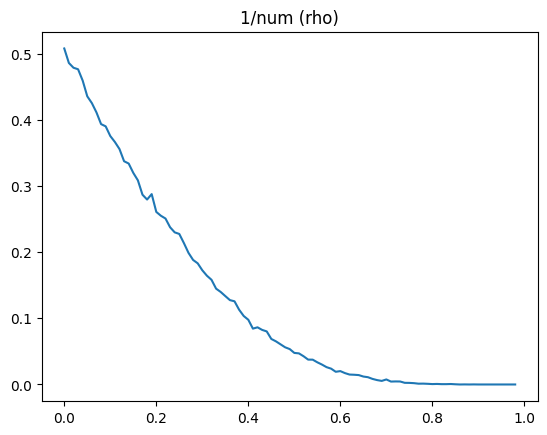

In [19]:
num_samples = 1000
rho_arr = np.arange(0,0.99,0.01)
result = []
for rho in rho_arr :
    counter = 0
    X = sample_gen(12)
    for j in range(num_samples) :
        Y = sample_gen(12)
        if sample_corr(X,Y) > rho :
            counter = counter + 1
    result.append(counter/num_samples)
    # print(result[-1])

plt.plot(rho_arr,result)
plt.title('1/num (rho)')
plt.show()

####  Тогда K($\rho$)

/tmp/ipykernel_547615/1651269292.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(rho_arr,1/np.array(result))


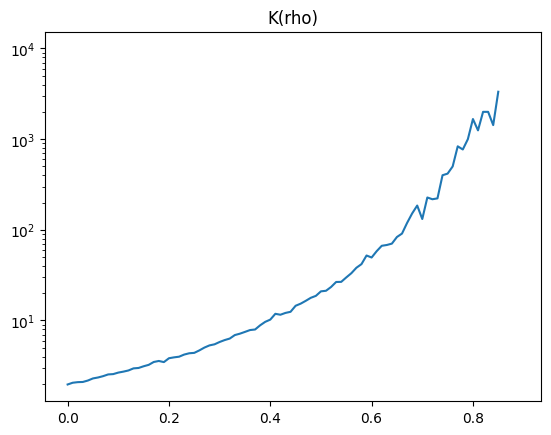

In [39]:
plt.plot(rho_arr,1/np.array(result))
plt.yscale('log')
plt.title('K(rho)')
plt.show()